In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from pandas.tools.plotting import scatter_matrix

%matplotlib inline

In [2]:
# need to manually set the print options in order to get data to display
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

Creating a DataFrame from a STATA .dta file
---------------------------------------------------

First we need to read-in the data from [Mankiw et al. (1992)](http://emlab.berkeley.edu/users/dromer/papers/MRW_QJE1992.pdf).  Can use a function from the statsmodels IO module for creating Pandas DataFrame (or NumPy ndarray) objects from STATA .dta files. 

More information on creating DataFrames can be found in the [Intro to Data Structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) tutorial.

In [3]:
# for more information about the genfromdta() function...
sm.iolib.foreign.genfromdta?

Note: the standard/preferred marker in Pandas for [missing data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data) is NaN.

In [4]:
# required intalling patsy and updating the versions of statsmodels and pandas included in Enthought
mrw_1992_data = sm.iolib.foreign.genfromdta('mrw1992.dta', missing_flt='NaN', pandas=True)
print(mrw_1992_data)

     c_index                c_name  c_code  cont  nonoil  inter  oecd  gdp60  \
0          1            b'Algeria'  b'DZA'     1       1      1     0   2485   
1          2             b'Angola'  b'AGO'     1       1      0     0   1588   
2          3              b'Benin'  b'BEN'     1       1      0     0   1116   
3          4           b'Botswana'  b'BWA'     1       1      1     0    959   
4          5       b'Burkina Faso'  b'BFA'     1       1      0     0    529   
5          6            b'Burundi'  b'BDI'     1       1      0     0    755   
6          7           b'Cameroon'  b'CMR'     1       1      1     0    889   
7          8  b'Central Afr. Rep.'  b'CAF'     1       1      0     0    838   
8          9               b'Chad'  b'TCD'     1       1      0     0    908   
9         10           b'PR Congo'  b'RCB'     1       1      0     0   1009   
10        11              b'Egypt'  b'EGY'     1       1      0     0    907   
11        12           b'Ethiopia'  b'ET

We are going to learn how to manipulate Pandas [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html) objects.  [Tutorial](http://pandas.pydata.org/pandas-docs/stable/basics.html) on the basic functionality of the Pandas package.

In [5]:
# let's take a look
mrw_1992_data

,c_index,c_name,c_code,cont,nonoil,inter,oecd,gdp60,gdp85,popgrowth,igdp,school
0,1,b'Algeria',b'DZA',1,1,1,0,2485,4371,2.6,24.100000,4.5
1,2,b'Angola',b'AGO',1,1,0,0,1588,1171,2.1,5.800000,1.8
2,3,b'Benin',b'BEN',1,1,0,0,1116,1071,2.4,10.800000,1.8
3,4,b'Botswana',b'BWA',1,1,1,0,959,3671,3.2,28.299999,2.9
4,5,b'Burkina Faso',b'BFA',1,1,0,0,529,857,0.9,12.700000,0.4
5,6,b'Burundi',b'BDI',1,1,0,0,755,663,1.7,5.100000,0.4
6,7,b'Cameroon',b'CMR',1,1,1,0,889,2190,2.1,12.800000,3.4
7,8,b'Central Afr. Rep.',b'CAF',1,1,0,0,838,789,1.7,10.500000,1.4
8,9,b'Chad',b'TCD',1,1,0,0,908,462,1.9,6.900000,0.4
9,10,b'PR Congo',b'RCB',1,1,0,0,1009,2624,2.4,28.799999,3.8


In [6]:
# look at the first 15 number of entries
mrw_1992_data.head(15)

,c_index,c_name,c_code,cont,nonoil,inter,oecd,gdp60,gdp85,popgrowth,igdp,school
0,1,b'Algeria',b'DZA',1,1,1,0,2485,4371,2.6,24.100000,4.5
1,2,b'Angola',b'AGO',1,1,0,0,1588,1171,2.1,5.800000,1.8
2,3,b'Benin',b'BEN',1,1,0,0,1116,1071,2.4,10.800000,1.8
3,4,b'Botswana',b'BWA',1,1,1,0,959,3671,3.2,28.299999,2.9
4,5,b'Burkina Faso',b'BFA',1,1,0,0,529,857,0.9,12.700000,0.4
5,6,b'Burundi',b'BDI',1,1,0,0,755,663,1.7,5.100000,0.4
6,7,b'Cameroon',b'CMR',1,1,1,0,889,2190,2.1,12.800000,3.4
7,8,b'Central Afr. Rep.',b'CAF',1,1,0,0,838,789,1.7,10.500000,1.4
8,9,b'Chad',b'TCD',1,1,0,0,908,462,1.9,6.900000,0.4
9,10,b'PR Congo',b'RCB',1,1,0,0,1009,2624,2.4,28.799999,3.8


In [7]:
# look at the last 15 number of entries
mrw_1992_data.tail(15)

,c_index,c_name,c_code,cont,nonoil,inter,oecd,gdp60,gdp85,popgrowth,igdp,school
106,107,b'Brazil',b'BRA',5,1,1,0,1842,5563,2.9,23.200001,4.7
107,108,b'Chile',b'CHL',5,1,1,0,5189,5533,2.3,29.700001,7.7
108,109,b'Colombia',b'COL',5,1,1,0,2672,4405,3.0,18.000000,6.1
109,110,b'Ecuador',b'ECU',5,1,1,0,2198,4504,2.8,24.400000,7.2
110,111,b'Guyana',b'GUY',5,0,0,0,2761,NaN,NaN,32.400002,11.7
111,112,b'Paraguay',b'PRY',5,1,1,0,1951,3914,2.7,11.700000,4.4
112,113,b'Peru',b'PER',5,1,1,0,3310,3775,2.9,12.000000,8.0
113,114,b'Surinam',b'SUR',5,0,0,0,3226,NaN,NaN,19.400000,8.1
114,115,b'Uruguay',b'URY',5,1,1,0,5119,5495,0.6,11.800000,7.0
115,116,b'Venezuela',b'VEN',5,1,1,0,10367,6336,3.8,11.400000,7.0


In [8]:
# view standard descriptive statistics for all variables in the data set
mrw_1992_data.describe()

,c_index,cont,nonoil,inter,oecd,gdp60,gdp85,popgrowth,igdp,school
count,121.000000,121.000000,121.000000,121.000000,121.000000,116.000000,108.000000,107.000000,121.000000,118.000000
mean,61.000000,2.512397,0.809917,0.619835,0.181818,3681.818848,5683.259277,2.279439,18.157024,5.526271
std,35.073732,1.517211,0.393998,0.487446,0.387298,7492.876083,5688.670495,0.998748,7.853310,3.532037
min,1.000000,1.000000,0.000000,0.000000,0.000000,383.000000,412.000000,0.300000,4.100000,0.400000
25%,31.000000,1.000000,1.000000,0.000000,0.000000,973.250000,1209.250000,1.700000,12.000000,2.400000
50%,61.000000,2.000000,1.000000,1.000000,0.000000,1962.000000,3484.500000,2.400000,17.700001,4.950000
75%,91.000000,4.000000,1.000000,1.000000,0.000000,4274.500000,7718.750000,2.900000,24.100000,8.175000
max,121.000000,6.000000,1.000000,1.000000,1.000000,77881.000000,25635.000000,6.800000,36.900002,12.100000


In [9]:
# summary statistics for GDP in 1960
mrw_1992_data.gdp60.describe()

count      116.000000
mean      3681.818848
std       7492.876083
min        383.000000
25%        973.250000
50%       1962.000000
75%       4274.500000
max      77881.000000
Name: gdp60, dtype: float64

In [10]:
# summary statistics for GDP in 1985
mrw_1992_data.gdp85.describe()

count      108.000000
mean      5683.259277
std       5688.670495
min        412.000000
25%       1209.250000
50%       3484.500000
75%       7718.750000
max      25635.000000
Name: gdp85, dtype: float64

More about data sets and variables
------------------------------------------

Here is a tutorial on [indexing and slicing](http://pandas.pydata.org/pandas-docs/stable/indexing.html) data in Pandas.

In [11]:
# it is possible to select a single column of data in a number of ways...
mrw_1992_data['c_name']

0                b'Algeria'
1                 b'Angola'
2                  b'Benin'
3               b'Botswana'
4           b'Burkina Faso'
5                b'Burundi'
6               b'Cameroon'
7      b'Central Afr. Rep.'
8                   b'Chad'
9               b'PR Congo'
10                 b'Egypt'
11              b'Ethiopia'
12                 b'Gabon'
13           b'Gambia, The'
14                 b'Ghana'
15                b'Guinea'
16           b'Ivory Coast'
17                 b'Kenya'
18               b'Lesotho'
19               b'Liberia'
20            b'Madagascar'
21                b'Malawi'
22                  b'Mali'
23            b'Mauritania'
24             b'Mauritius'
25               b'Morocco'
26            b'Mozambique'
27                 b'Niger'
28               b'Nigeria'
29                b'Rwanda'
30               b'Senegal'
31          b'Sierra Leone'
32               b'Somalia'
33          b'South Africa'
34                 b'Sudan'
35             b'Swa

In [13]:
# can select multiple columns of data by passing a list of colnames
mrw_1992_data[['c_name', 'c_code']]

,c_name,c_code
0,b'Algeria',b'DZA'
1,b'Angola',b'AGO'
2,b'Benin',b'BEN'
3,b'Botswana',b'BWA'
4,b'Burkina Faso',b'BFA'
5,b'Burundi',b'BDI'
6,b'Cameroon',b'CMR'
7,b'Central Afr. Rep.',b'CAF'
8,b'Chad',b'TCD'
9,b'PR Congo',b'RCB'


In [14]:
# another example...note the missing values!
mrw_1992_data[['c_name', 'popgrowth']]

,c_name,popgrowth
0,b'Algeria',2.6
1,b'Angola',2.1
2,b'Benin',2.4
3,b'Botswana',3.2
4,b'Burkina Faso',0.9
5,b'Burundi',1.7
6,b'Cameroon',2.1
7,b'Central Afr. Rep.',1.7
8,b'Chad',1.9
9,b'PR Congo',2.4


In [15]:
# a final example using an even bigger list!
mrw_1992_data[['c_name', 'gdp60', 'gdp85', 'popgrowth', 'igdp', 'school']]

,c_name,gdp60,gdp85,popgrowth,igdp,school
0,b'Algeria',2485,4371,2.6,24.100000,4.5
1,b'Angola',1588,1171,2.1,5.800000,1.8
2,b'Benin',1116,1071,2.4,10.800000,1.8
3,b'Botswana',959,3671,3.2,28.299999,2.9
4,b'Burkina Faso',529,857,0.9,12.700000,0.4
5,b'Burundi',755,663,1.7,5.100000,0.4
6,b'Cameroon',889,2190,2.1,12.800000,3.4
7,b'Central Afr. Rep.',838,789,1.7,10.500000,1.4
8,b'Chad',908,462,1.9,6.900000,0.4
9,b'PR Congo',1009,2624,2.4,28.799999,3.8


Data Visualization
---------------------------

It's very important to look at your data!  The most basic univarite plot is a [histogram](http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms).  Pandas has a lot of [built-in](http://pandas.pydata.org/pandas-docs/stable/visualization.html) methods for plotting using matplotlib.  Of course one can always create graphics using the standard [matplotlib](http://matplotlib.org/index.html) commands.

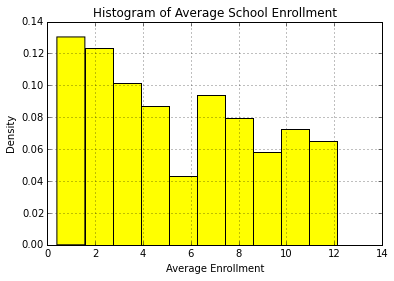

In [16]:
fig = plt.figure()

# use pandas built-in method to create the histogram
ax = mrw_1992_data['school'].hist(color='yellow', normed=True)

# add labels and a title
ax.set_xlabel('Average Enrollment')
ax.set_ylabel('Density')
ax.set_title('Histogram of Average School Enrollment')

plt.show()

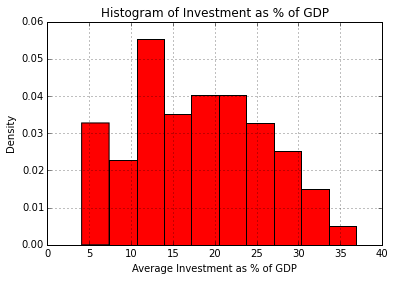

In [17]:
fig = plt.figure()

# color specified using rgb tuple!
ax = mrw_1992_data['igdp'].hist(color=(1,0,0), normed=True)

# add labels and a title
ax.set_xlabel('Average Investment as % of GDP')
ax.set_ylabel('Density')
ax.set_title('Histogram of Investment as % of GDP')

plt.show()

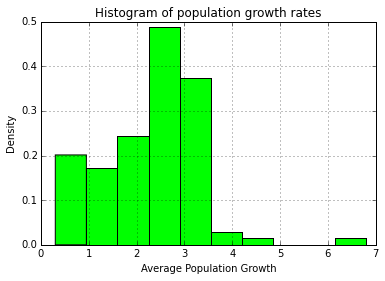

In [18]:
fig = plt.figure()

# color specified using rgb tuple!
ax = mrw_1992_data['popgrowth'].hist(color=(0,1,0), normed=True)

# add labels and a title
ax.set_xlabel('Average Population Growth')
ax.set_ylabel('Density')
ax.set_title('Histogram of population growth rates')

plt.show()

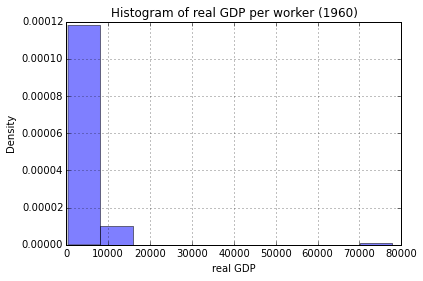

In [19]:
fig = plt.figure()

# color specified using rgb tuple, alpha controls the transparency
ax = mrw_1992_data['gdp60'].hist(color=(0,0,1), normed=True, alpha=0.5)

# add labels and a title
ax.set_xlabel('real GDP')
ax.set_ylabel('Density')
ax.set_title('Histogram of real GDP per worker (1960)')

plt.show()

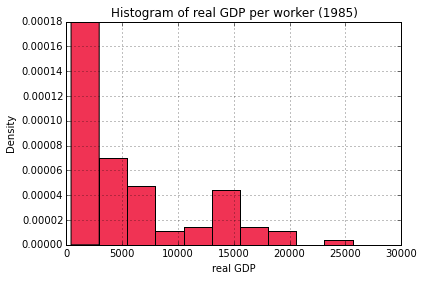

In [20]:
fig = plt.figure()

# color specified using rgb tuple, alpha controls the transparency
ax = mrw_1992_data['gdp85'].hist(color=(0.94,0.2,0.33), normed=True)

# add labels and a title
ax.set_xlabel('real GDP')
ax.set_ylabel('Density')
ax.set_title('Histogram of real GDP per worker (1985)')

plt.show()

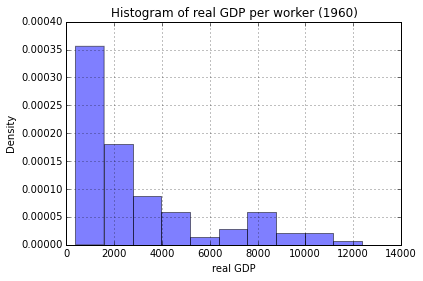

In [21]:
fig = plt.figure()

# first we subset the entire data set, and then we select the 'gdp60' series
ax = mrw_1992_data[mrw_1992_data['gdp60'] < 15000]['gdp60'].hist(color=(0,0,1), normed=True, alpha=0.5)

# add labels and a title
ax.set_xlabel('real GDP')
ax.set_ylabel('Density')
ax.set_title('Histogram of real GDP per worker (1960)')

plt.show()

A good way to compare subsets of data is a [box plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plotting).  A box plot will display boxes bordered at the 25<sup>th</sup> and 75<sup>th</sup> percentiles of the variable with a median line at the 50<sup>th</sup> percentile.  Box plots also have whiskers which, typically, extend 1.5 times the IQR beyond the 2<sup>nd</sup> and 3<sup>rd</sup> quartiles. 

The following box plot should give you some idea of how average population growth rates have varied across continents. 

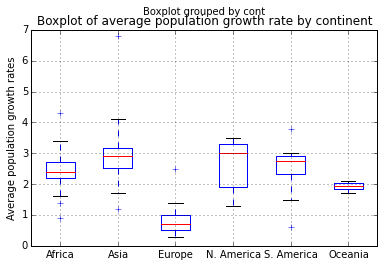

In [22]:
fig = plt.figure()

ax = mrw_1992_data[['cont', 'popgrowth']].boxplot(by='cont', sym='b+', whis=1.5)
ax.set_xlabel('') # gets rid of default xlabel!
ax.set_xticklabels(['Africa', 'Asia', 'Europe', 'N. America', 'S. America', 'Oceania'])
ax.set_ylabel('Average population growth rates')
ax.set_title('Boxplot of average population growth rate by continent')

plt.show()

Suppose that we wanted to look at school enrollment rates instead of population growth rates?

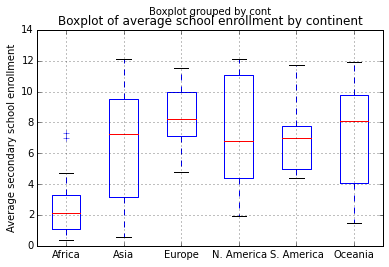

In [23]:
fig = plt.figure()

ax = mrw_1992_data[['cont', 'school']].boxplot(by='cont')
ax.set_xlabel('')
ax.set_xticklabels(['Africa', 'Asia', 'Europe', 'N. America', 'S. America', 'Oceania'])
ax.set_ylabel('Average secondary school enrollment')
ax.set_title('Boxplot of average school enrollment by continent')

plt.show()

Note that school enrollment rates seem to be less variable than average population growth rates.  What about investment rates?

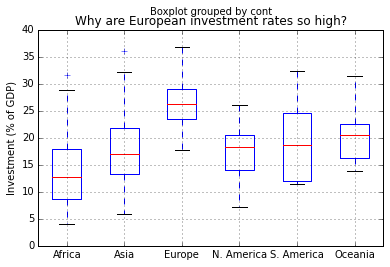

In [24]:
fig = plt.figure()

ax = mrw_1992_data[['cont', 'igdp']].boxplot(by='cont')
ax.set_xlabel('')
ax.set_xticklabels(['Africa', 'Asia', 'Europe', 'N. America', 'S. America', 'Oceania'])
ax.set_ylabel('Investment (% of GDP)')
ax.set_title('Why are European investment rates so high?')

plt.show()

What if we wanted to compare investment rates in OECD countries with those of non-OECD countries?

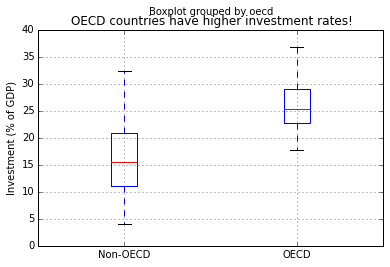

In [25]:
fig = plt.figure()

ax = mrw_1992_data[['oecd', 'igdp']].boxplot(by='oecd')
ax.set_xlabel('')
ax.set_xticklabels(['Non-OECD', 'OECD'])
ax.set_ylabel('Investment (% of GDP)')
ax.set_title('OECD countries have higher investment rates!')

plt.show()

We are also interested in how variables relate to one another. The most basic bivariate data view is the scatterplot.  To see how real GDP per worker in 1985 relates to average population growth in the previous 25 years...

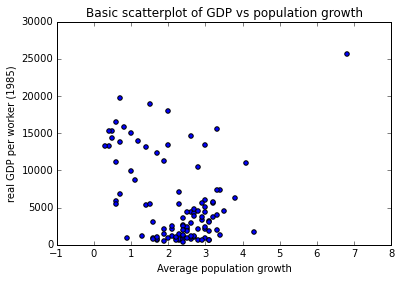

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# let's just use the values of the dataframe
X = mrw_1992_data.popgrowth.values
Y = mrw_1992_data.gdp85.values

ax.scatter(X, Y)
ax.set_xlabel('Average population growth')
ax.set_ylim(0, 30000)
ax.set_ylabel('real GDP per worker (1985)')
ax.set_title('Basic scatterplot of GDP vs population growth')

plt.show()

The above scatterplot is not terribly informative, except that we now know that there is one country with very high average population growth rates that is also very rich in 1985! Maybe average investment rates will be more informative...

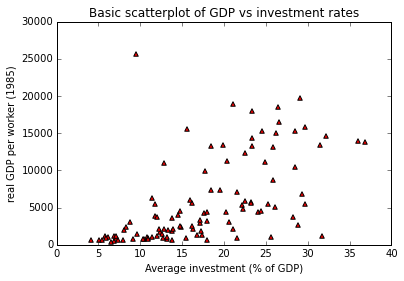

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = mrw_1992_data.igdp.values
Y = mrw_1992_data.gdp85.values

# scatterplot with red triangles...
ax.scatter(X, Y, c='r', marker='^')
ax.set_xlabel('Average investment (% of GDP)')
ax.set_ylim(0, 30000)
ax.set_ylabel('real GDP per worker (1985)')
ax.set_title('Basic scatterplot of GDP vs investment rates')

plt.show()

This scatterplot is a little better (but not much). Note the potential outlier (i.e., the lone country with low average investment rates over 1960-1985 but high GDP per worker in 1985).  There are lots of potential combinations of scatterplots (even with just five variables!).  Sometimes it is useful to look at all of them at once using the [scatter_matrix](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot-matrix) command...

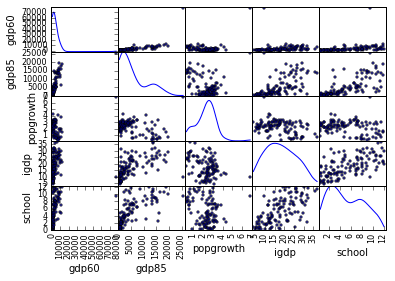

In [30]:
scatter_matrix(mrw_1992_data[['gdp60', 'gdp85', 'popgrowth', 'igdp', 'school']], alpha=0.75, diagonal='kde')

plt.show()

Notice the gdp60 vs gdp85 scatterplots in the top left corner.  These plots have the predicted positive slope (implying that real GDP per worker in 1960 an real GDP per worker are positively correlated), but there is a conspicuous outlier...

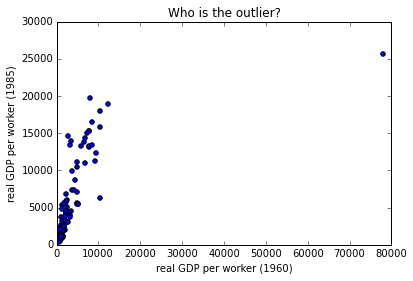

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = mrw_1992_data.gdp60.values
Y = mrw_1992_data.gdp85.values

ax.scatter(X, Y, )
ax.set_xlim(0, 80000)
ax.set_xlabel('real GDP per worker (1960)')
ax.set_ylim(0, 30000)
ax.set_ylabel('real GDP per worker (1985)')
ax.set_title('Who is the outlier?')

plt.show()

There are many possible ways one could go about answering the question.  Let's go with a graphical solution and create a scatterplot that uses country codes (i.e., the c_code variable in our dataset) instead of the default blue dots for the markers.

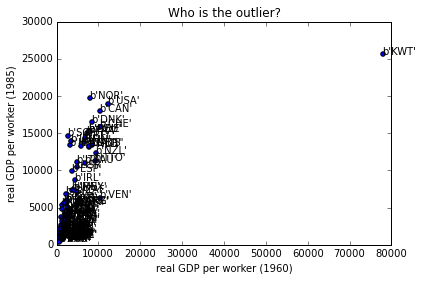

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = mrw_1992_data.gdp60.values
Y = mrw_1992_data.gdp85.values
c_codes = mrw_1992_data.c_code.values

ax.scatter(X, Y, marker='o')

for i in range(len(mrw_1992_data)):
    code = mrw_1992_data[['c_code', 'gdp60', 'gdp85']].values[i][0]
    x = mrw_1992_data[['c_code', 'gdp60', 'gdp85']].values[i][1]
    y = mrw_1992_data[['c_code', 'gdp60', 'gdp85']].values[i][2]
    
    # skip entries with missing values!
    if np.isfinite(x) and np.isfinite(y):
        ax.text(x, y, code)
    
ax.set_xlim(0, 80000)
ax.set_xlabel('real GDP per worker (1960)')
ax.set_ylim(0, 30000)
ax.set_ylabel('real GDP per worker (1985)')
ax.set_title('Who is the outlier?')

plt.show()

The rich outlier was Kuwait.  If you previously read through the Mankiw, Romer, Weil paper, you will remember that they didn't use oil exporting countries for most of their analysis.  The argument was that the productivity of oil exporters was dominated by extraction rather than the returns to investment and thus we should not expect them to conform to the Solow model. 


Using logical conditions to examine subsets of observations:
--------------------------------------------------------------------

I have already been using logical conditions to subset data above...probably would want to move/eliminate this section and replace with more examples from the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/index.html).

Let's look at the difference between oil exporting countries and non-oil exporting countries.  Looking at the output, we can see that oil exporting countries have a higher mean and variance of GDP per worker (especially in 1960).

In [33]:
# oil exporters...recall oil exporters are nonoil == 0!
mrw_1992_data[mrw_1992_data['nonoil'] == 0][['gdp60', 'gdp85']].describe()

,gdp60,gdp85
count,18.000000,10.000000
mean,7421.722168,9343.500000
std,17762.556573,8257.389418
min,431.000000,869.000000
25%,1244.750000,2776.000000
50%,3056.500000,6513.000000
75%,4595.500000,14452.250000
max,77881.000000,25635.000000


In [34]:
# non-oil exporters
mrw_1992_data[mrw_1992_data['nonoil'] == 1][['gdp60', 'gdp85']].describe()

,gdp60,gdp85
count,98.000000,98.000000
mean,2994.897949,5309.765137
std,2862.522140,5277.183340
min,383.000000,412.000000
25%,963.750000,1174.750000
50%,1818.000000,3150.000000
75%,4113.250000,7015.000000
max,12362.000000,19723.000000


A lot of our previously outlier-dominated graphs become a lot more reasonable when we exclude oil-exporting countries.

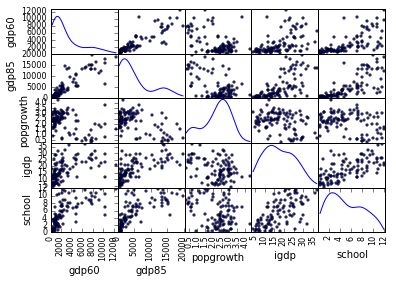

In [35]:
scatter_matrix(mrw_1992_data[mrw_1992_data['nonoil'] == 1][['gdp60', 'gdp85', 'popgrowth', 'igdp', 'school']], alpha=0.75, diagonal='kde')

plt.show()

Zooming in on the GDP per worker 1960 vs. GDP per worker 1985 graph, we can see that we have a new set of outliers-one "bad" and a few "good."

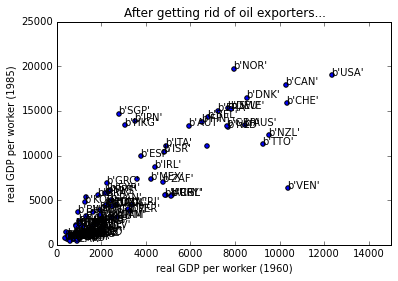

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = mrw_1992_data.gdp60.values
Y = mrw_1992_data.gdp85.values
c_codes = mrw_1992_data.c_code.values

ax.scatter(X, Y, marker='o')

# must be a more elegant way than this...
for i in range(len(mrw_1992_data[mrw_1992_data['nonoil'] == 1])):
    code = mrw_1992_data[mrw_1992_data['nonoil'] == 1][['c_code', 'gdp60', 'gdp85']].values[i][0]
    x = mrw_1992_data[mrw_1992_data['nonoil'] == 1][['c_code', 'gdp60', 'gdp85']].values[i][1]
    y = mrw_1992_data[mrw_1992_data['nonoil'] == 1][['c_code', 'gdp60', 'gdp85']].values[i][2]
    
    # skip entries with missing values!
    if np.isfinite(x) and np.isfinite(y):
        ax.text(x, y, code)
    
ax.set_xlim(0, 15000)
ax.set_xlabel('real GDP per worker (1960)')
ax.set_ylim(0, 25000)
ax.set_ylabel('real GDP per worker (1985)')
ax.set_title('After getting rid of oil exporters...')

plt.show()

Now we can see that the "bad" (i.e., negtive growth) outlier is Venezuela. Venezuela is an oil exporting country, but exports were apparently not big enough as a fraction of GDP to meet the MRW criteria for exclusion.  The "good" (i.e., lots of growth) outliers are the growth miracles of Japan, Singapore, and Hong Kong.  Note how bunched the data seem to be in the bottom left-hand corner.  It sure would be nice if we could somehow stretch the axes in such a way that this data would become more spread out.  In the next section you will learn see how this can be done by transforming the data using the natural logarithm.

But first we need to decide what to do with the data on oil exporters.  Since MRW exclude oil exporting countries from the analysis, we are going to follow their lead and exclude them from ours as well.

In [37]:
# easiest way that I could think of to accomplish this...
mrw_1992_data_nonoil = mrw_1992_data[mrw_1992_data['nonoil'] == 1]
mrw_1992_data_nonoil 

,c_index,c_name,c_code,cont,nonoil,inter,oecd,gdp60,gdp85,popgrowth,igdp,school
0,1,b'Algeria',b'DZA',1,1,1,0,2485,4371,2.6,24.100000,4.5
1,2,b'Angola',b'AGO',1,1,0,0,1588,1171,2.1,5.800000,1.8
2,3,b'Benin',b'BEN',1,1,0,0,1116,1071,2.4,10.800000,1.8
3,4,b'Botswana',b'BWA',1,1,1,0,959,3671,3.2,28.299999,2.9
4,5,b'Burkina Faso',b'BFA',1,1,0,0,529,857,0.9,12.700000,0.4
5,6,b'Burundi',b'BDI',1,1,0,0,755,663,1.7,5.100000,0.4
6,7,b'Cameroon',b'CMR',1,1,1,0,889,2190,2.1,12.800000,3.4
7,8,b'Central Afr. Rep.',b'CAF',1,1,0,0,838,789,1.7,10.500000,1.4
8,9,b'Chad',b'TCD',1,1,0,0,908,462,1.9,6.900000,0.4
9,10,b'PR Congo',b'RCB',1,1,0,0,1009,2624,2.4,28.799999,3.8


How would you summarize GDP per worker for all observations where the variable igdp is *below* its median value? 

In [38]:
mrw_1992_data_nonoil[mrw_1992_data_nonoil['igdp'] < np.median(mrw_1992_data_nonoil['igdp'])][['gdp60', 'gdp85']].describe() 

,gdp60,gdp85
count,48.000000,48.000000
mean,1535.937500,1900.333374
std,1589.103993,1479.707066
min,455.000000,412.000000
25%,819.000000,836.500000
50%,1066.000000,1229.000000
75%,1634.250000,2368.500000
max,10367.000000,6336.000000


Creating new variables:
-------------------------------

More information on applying function to Pandas DataFrame objects can be found [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#function-application).

In [39]:
# create some new variables using the natural logarithm function from NumPy
mrw_1992_data_nonoil['lngdp60'] = np.log(mrw_1992_data_nonoil['gdp60'])
mrw_1992_data_nonoil['lngdp85'] = np.log(mrw_1992_data_nonoil['gdp85'])

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [40]:
# View the data
mrw_1992_data_nonoil

,c_index,c_name,c_code,cont,nonoil,inter,oecd,gdp60,gdp85,popgrowth,igdp,school,lngdp60,lngdp85
0,1,b'Algeria',b'DZA',1,1,1,0,2485,4371,2.6,24.100000,4.5,7.818028,8.382747
1,2,b'Angola',b'AGO',1,1,0,0,1588,1171,2.1,5.800000,1.8,7.370231,7.065613
2,3,b'Benin',b'BEN',1,1,0,0,1116,1071,2.4,10.800000,1.8,7.017506,6.976348
3,4,b'Botswana',b'BWA',1,1,1,0,959,3671,3.2,28.299999,2.9,6.865891,8.208220
4,5,b'Burkina Faso',b'BFA',1,1,0,0,529,857,0.9,12.700000,0.4,6.270988,6.753438
5,6,b'Burundi',b'BDI',1,1,0,0,755,663,1.7,5.100000,0.4,6.626718,6.496775
6,7,b'Cameroon',b'CMR',1,1,1,0,889,2190,2.1,12.800000,3.4,6.790097,7.691657
7,8,b'Central Afr. Rep.',b'CAF',1,1,0,0,838,789,1.7,10.500000,1.4,6.731018,6.670766
8,9,b'Chad',b'TCD',1,1,0,0,908,462,1.9,6.900000,0.4,6.811244,6.135565
9,10,b'PR Congo',b'RCB',1,1,0,0,1009,2624,2.4,28.799999,3.8,6.916715,7.872455


Now we can graph the data in logs!

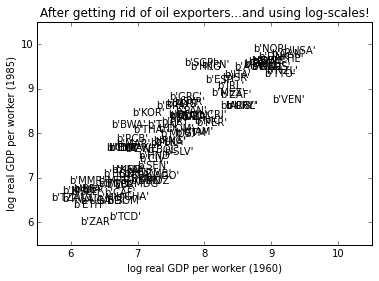

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = mrw_1992_data_nonoil.lngdp60.values
Y = mrw_1992_data_nonoil.lngdp85.values

# get rid of the marker!
ax.scatter(X, Y, color='red', marker='')

# must be a more elegant way than this...
for i in range(len(mrw_1992_data_nonoil)):
    code = mrw_1992_data_nonoil[['c_code', 'lngdp60', 'lngdp85']].values[i][0]
    x = mrw_1992_data_nonoil[['c_code', 'lngdp60', 'lngdp85']].values[i][1]
    y = mrw_1992_data_nonoil[['c_code', 'lngdp60', 'lngdp85']].values[i][2]
    
    # skip entries with missing values!
    if np.isfinite(x) and np.isfinite(y):
        ax.text(x, y, code, ha='center', va='center')
    
ax.set_xlim(5.5, 10.5)
ax.set_xlabel('log real GDP per worker (1960)')
ax.set_ylim(5.5, 10.5)
ax.set_ylabel('log real GDP per worker (1985)')
ax.set_title('After getting rid of oil exporters...and using log-scales!')

plt.show()

Another variable we'll want to generate is the average annual growth rate of real GDP per worker over the 25 year sample period.

In [42]:
# generate a third variable
mrw_1992_data_nonoil['growth'] = (mrw_1992_data_nonoil['lngdp85'] - mrw_1992_data_nonoil['lngdp60']) / 25.

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


Regression and correlation:
-----------------------------------


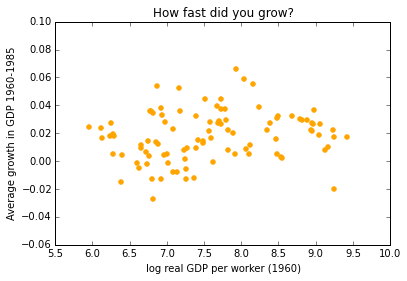

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = mrw_1992_data_nonoil.lngdp60.values
Y = mrw_1992_data_nonoil.growth.values

ax.scatter(X, Y, color='orange', marker='o')

ax.set_xlabel('log real GDP per worker (1960)')
ax.set_ylabel('Average growth in GDP 1960-1985')
ax.set_title('How fast did you grow?')

plt.show()

In [44]:
# our endogenous (or dependent or response variable) is growth
y = mrw_1992_data_nonoil['growth']

# our matrix of exogenous (or independent variables) are a constant and lngdp60
X = sm.add_constant(mrw_1992_data_nonoil['lngdp60'], prepend=True)

# run the regression
results = sm.OLS(endog=y, exog=X).fit()

# examine the output
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.613
Date:                Tue, 27 Oct 2015   Prob (F-statistic):             0.0603
Time:                        11:58:18   Log-Likelihood:                 257.75
No. Observations:                  98   AIC:                            -511.5
Df Residuals:                      96   BIC:                            -506.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0107      0.015     -0.702      0.4

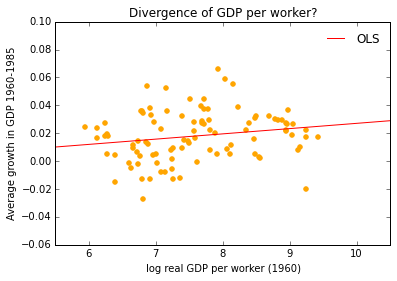

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = mrw_1992_data_nonoil.lngdp60.values
Y = mrw_1992_data_nonoil.growth.values

# the scatterplot
ax.scatter(X, Y, color='orange', marker='o')

# doesn't seem to be a command to plot a line using slope and intercept!
grid = np.linspace(5, 10.5, 1000)
ax.plot(grid, results.params[1] * grid + results.params[0], color='red', label='OLS')

ax.set_xlim(5.5, 10.5)
ax.set_xlabel('log real GDP per worker (1960)')
ax.set_ylabel('Average growth in GDP 1960-1985')
ax.set_title('Divergence of GDP per worker?')

ax.legend(loc='best', frameon=False)

plt.show()

In [46]:
# Create a correlation matrix
mrw_1992_data_nonoil[['growth', 'lngdp60', 'lngdp85', 'popgrowth', 'igdp', 'school']].corr()

,growth,lngdp60,lngdp85,popgrowth,igdp,school
growth,1.000000,0.190446,0.572604,-0.166431,0.574826,0.443433
lngdp60,0.190446,1.000000,0.913878,-0.405643,0.595099,0.776475
lngdp85,0.572604,0.913878,1.000000,-0.407588,0.734702,0.831833
popgrowth,-0.166431,-0.405643,-0.407588,1.000000,-0.328065,-0.316933
igdp,0.574826,0.595099,0.734702,-0.328065,1.000000,0.633984
school,0.443433,0.776475,0.831833,-0.316933,0.633984,1.000000


From the above correlation matrix you can see that growth isn't just correlated with the level of GDP per worker in 1960! GDP is also positively correlated with rates of investment and enrollment in secondary eduction, and is negatively correlated with population growth rates.  Given the strength of these correlations, it is entirely possible that the relationship we thought we saw between growth and initial GDP was actually the result of these other relationships that we totally ignored!

What happens if we include these other variables in the regression we get quite a different result.

In [47]:
# our endogenous (or dependent or response variable) is growth
y = mrw_1992_data_nonoil['growth']

# our matrix of exogenous (or independent variables) are a constant and lngdp60
X = sm.add_constant(mrw_1992_data_nonoil[['lngdp60', 'popgrowth', 'igdp', 'school']], prepend=True)

# run the regression
results = sm.OLS(endog=y, exog=X).fit()

# examine the output
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     19.23
Date:                Tue, 27 Oct 2015   Prob (F-statistic):           1.49e-11
Time:                        11:59:35   Log-Likelihood:                 285.47
No. Observations:                  98   AIC:                            -560.9
Df Residuals:                      93   BIC:                            -548.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0669      0.018      3.680      0.0